In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing this package to format the datetime.
import matplotlib.dates as mdates

%matplotlib inline

In [3]:
# Setting the date column as an index and converting to datetime.
page_df = pd.read_csv("time_series_page_view.txt")
page_df["date"] = pd.to_datetime(page_df["date"])
page_df.index = page_df["date"]
page_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1304 non-null   datetime64[ns]
 1   value   1304 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 30.6 KB


In [4]:
# Cleaning the dataset
# Filter data 
top_page_views_data = page_df.loc[(page_df["value"] >= np.quantile(page_df["value"],0.025)) & (page_df["value"] <= np.quantile(page_df["value"],0.975))]

top_page_views_data

,date,value
date,,
2016-05-19,2016-05-19,19736
2016-05-26,2016-05-26,18060
2016-05-27,2016-05-27,19997
2016-05-28,2016-05-28,19044
2016-05-29,2016-05-29,20325
...,...,...
2019-11-24,2019-11-24,138875
2019-11-29,2019-11-29,171584
2019-11-30,2019-11-30,141161


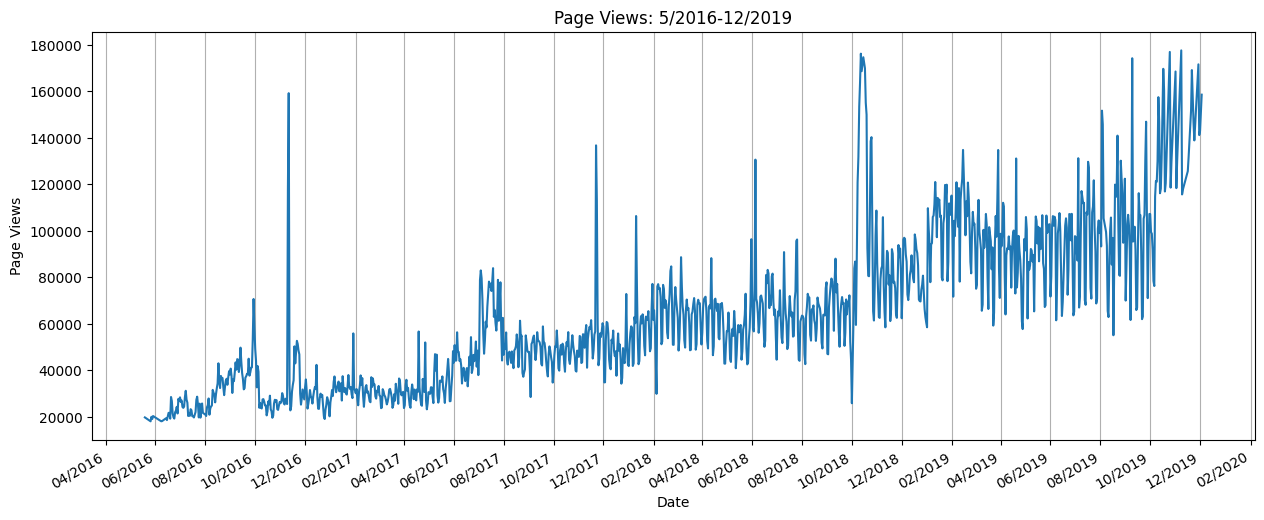

<Figure size 640x480 with 0 Axes>

In [5]:
def draw_line_plot():
 
    fig,ax = plt.subplots(figsize=(15,6))
    fig = sns.lineplot(data=top_page_views_data,x="date",y="value",markers="o")
    fig.set_title("Page Views: 5/2016-12/2019")
    fig.set_xlabel("Date")
    fig.set_ylabel("Page Views")
    # set monthly locator
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    ax.xaxis.grid(True)
    # set font and rotation for date tick labels
    plt.gcf().autofmt_xdate()
    plt.show(fig)
    plt.clf()
    
draw_line_plot()

#### Observations:
From the line plot above we can discern that there has been a steady increase in the page visits over time after December 2016. There have been a few outliers in this series which can be attributed to perhaps a sale/special event during that time or perhaps some exclusive event. However a steady increase can also mean that the popularity of certain aspects are increasing.

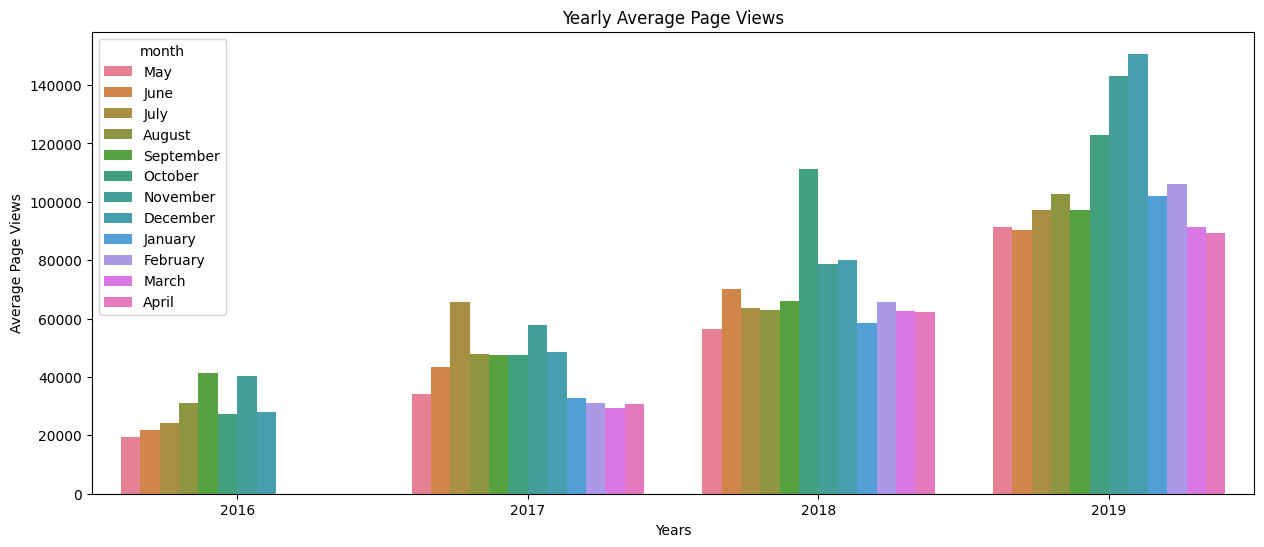

<Figure size 640x480 with 0 Axes>

In [6]:
# Show average daily page views for each month grouped by year.
# Creating a copy of the data.
def draw_bar_plot():
    page_df_copy_bar_plot = top_page_views_data.copy(deep=True)

    # By grouping method
    yearly_df = page_df_copy_bar_plot.groupby(page_df_copy_bar_plot["date"].dt.to_period("M"))["value"].mean().reset_index()
    yearly_df["date"] = yearly_df["date"].dt.to_timestamp(freq="M")
    yearly_df["year"] = yearly_df["date"].dt.year
    yearly_df["month"] = yearly_df["date"].dt.month_name()
    
    # Drawing the plot
    fig,ax = plt.subplots(figsize=(15,6))
    fig = sns.barplot(data=yearly_df,x="year",y="value",hue="month")
    fig.set(xlabel="Years",ylabel="Average Page Views",title="Yearly Average Page Views")
        
    plt.show()
    plt.clf()
    
draw_bar_plot()


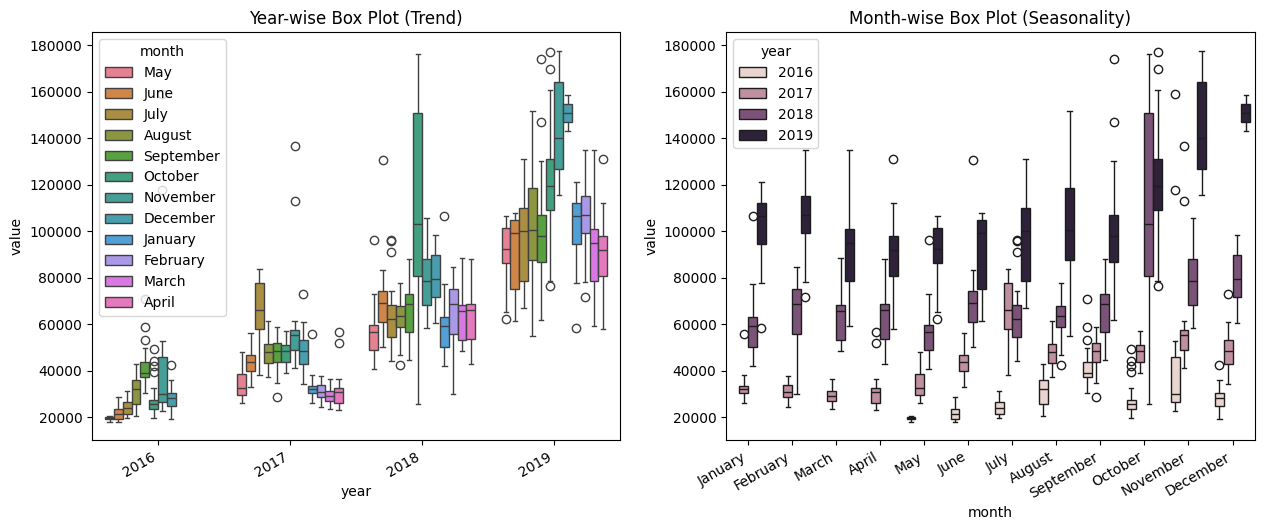

<Figure size 640x480 with 0 Axes>

In [7]:
# show how the values are distributed within a given year or month and how it compares over time.
def draw_box_plot():
    multi_plot_copy = top_page_views_data.copy(deep=True)
    multi_plot_copy["year"] = multi_plot_copy["date"].dt.year
    multi_plot_copy["month"] = multi_plot_copy["date"].dt.month_name()
    multi_plot_copy.reset_index(drop=True,inplace=True)
    multi_plot_copy.sort_values(by=["year","date"],ascending=[False,True],inplace=True)

    # Drawing the box plot
    # Plot 1
    fig,ax = plt.subplots(1,2,figsize=(15,6))
    g = sns.boxplot(ax=ax[0],data=multi_plot_copy,x="year",y="value",hue="month",legend="auto")
    g.set_title("Year-wise Box Plot (Trend)")

    # Plot 2
    f = sns.boxplot(ax=ax[1],data=multi_plot_copy,x="month",y="value",hue="year",legend="auto")
    f.set_title("Month-wise Box Plot (Seasonality)")
    
    fig.autofmt_xdate()
    plt.show()
    plt.clf()
    
draw_box_plot()

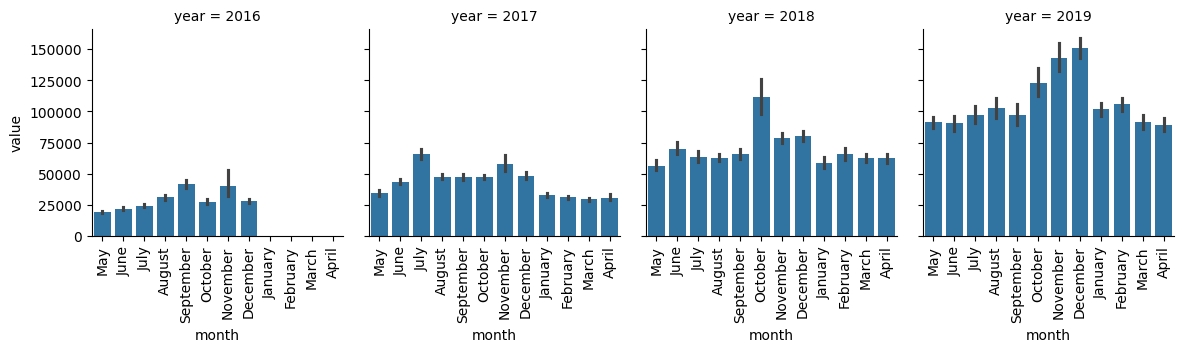

<Figure size 640x480 with 0 Axes>

In [9]:
# Showing a comparison of values over time.
multi_plot_copy = top_page_views_data.copy(deep=True)
multi_plot_copy["year"] = multi_plot_copy["date"].dt.year
multi_plot_copy["month"] = multi_plot_copy["date"].dt.month_name()
multi_plot_copy.reset_index(drop=True,inplace=True)
ordered_days = multi_plot_copy.sort_values(by=["year","date"],ascending=[False,True],inplace=True)
fig = sns.FacetGrid(multi_plot_copy,col="year",row_order=ordered_days)
fig.map(sns.barplot,"month","value",order=ordered_days)
fig.set_xticklabels(rotation=90)
plt.show()
plt.clf()